In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import os
import random
import numpy as np
from tqdm import tqdm
from skimage import io
from skimage.transform import resize
import matplotlib.pyplot as plt
import random
import time
from sklearn.model_selection import train_test_split

In [ ]:
seed = 42
np.random.seed = seed

IMG_WIDTH = 256
IMG_HEIGHT = 512
IMG_CHANNEL = 1

In [ ]:
def get_data(file_path):
    
    file = open(file_path, "r")

    allText = file.read()

    words = list(map(str, allText.split()))

    matrice_height = int(len(words) / 30)
    matrice = np.ones((matrice_height, 24))

    emplacement = 20
    iter1 = 0
    for i in range(emplacement, int(len(words) / 30) + emplacement):
        iter2 = 0
        for j in range(emplacement + 6, emplacement + 30):
            matrice[(iter1, iter2)] = words[j]
            iter2 += 1
        iter1 += 1
        emplacement += 30
    X_2 = np.delete(matrice, 1, 1)
    X_final = np.delete(X_2, 10, 1)
    
    file.close()
    
    return X_final

In [ ]:
file_in_path = "C_maps_in.txt"
file_out_path = "C_maps_out.txt"

X = get_data(file_in_path)
y = get_data(file_out_path)

In [ ]:
X_T = X.T

In [ ]:
y_T = y.T

In [ ]:
X_T.shape

In [ ]:
y_T.shape

In [ ]:
X_T_R = X_T.reshape((22, 499, 802))

In [ ]:
X_T_R.shape

In [ ]:
y_t_r = y_T.reshape((22, 499, 802))

In [ ]:
y_t_r.shape

In [ ]:
X = X_T_R
y = y_t_r

In [37]:
# Build the model
inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNEL))
# convert to float
# s = tf.keras.layers.Lambda(lambda x: x / 7)(inputs)

In [38]:
# Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(inputs)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
p4 = tf.keras.layers.MaxPooling2D((2, 2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)


In [39]:
# Expansive path
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same")(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same")(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding="same")(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding="same")(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

outputs = tf.keras.layers.Conv2D(1, (1, 1))(c9) # activation="sigmoid"

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer="adam", loss="mae", metrics=["accuracy"])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_38 (Conv2D)             (None, 256, 512, 16  160         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_18 (Dropout)           (None, 256, 512, 16  0           ['conv2d_38[0][0]']              
                                )                                                           

 conv2d_52 (Conv2D)             (None, 128, 256, 32  18464       ['concatenate_10[0][0]']         
                                )                                                                 
                                                                                                  
 dropout_25 (Dropout)           (None, 128, 256, 32  0           ['conv2d_52[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_53 (Conv2D)             (None, 128, 256, 32  9248        ['dropout_25[0][0]']             
                                )                                                                 
                                                                                                  
 conv2d_transpose_11 (Conv2DTra  (None, 256, 512, 16  2064       ['conv2d_53[0][0]']              
 nspose)  

In [40]:
y.shape

(22, 256, 512)

In [41]:
X = X[:,:256,:512]

In [42]:
y = y[:,:256,:512]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [48]:
# Model checkpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint("Unet.h5", verbose=1, save_best_only=True)
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=1000, monitor="val_loss"),
    tf.keras.callbacks.TensorBoard(log_dir="logs")
]

results = model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=16,
    epochs=2000,
    callbacks=callbacks
)

Epoch 1/2000
1/1 [==============================] - 8s 8s/step - loss: 0.4312 - accuracy: 0.0020 - val_loss: 1.9622 - val_accuracy: 0.0026
Epoch 2/2000
1/1 [==============================] - 8s 8s/step - loss: 0.4386 - accuracy: 0.0019 - val_loss: 1.9570 - val_accuracy: 0.0026
Epoch 3/2000
1/1 [==============================] - 8s 8s/step - loss: 0.4321 - accuracy: 0.0021 - val_loss: 1.9563 - val_accuracy: 0.0026
Epoch 4/2000
1/1 [==============================] - 8s 8s/step - loss: 0.4321 - accuracy: 0.0021 - val_loss: 1.9304 - val_accuracy: 0.0026
Epoch 5/2000
1/1 [==============================] - 8s 8s/step - loss: 0.4154 - accuracy: 0.0023 - val_loss: 1.9269 - val_accuracy: 0.0026
Epoch 6/2000
1/1 [==============================] - 8s 8s/step - loss: 0.4402 - accuracy: 0.0022 - val_loss: 1.9471 - val_accuracy: 0.0026
Epoch 7/2000
1/1 [==============================] - 8s 8s/step - loss: 0.4210 - accuracy: 0.0021 - val_loss: 1.9409 - val_accuracy: 0.0026
Epoch 8/2000
1/1 [=========

1/1 [==============================] - 13s 13s/step - loss: 0.3689 - accuracy: 0.0021 - val_loss: 1.9126 - val_accuracy: 0.0026
Epoch 60/2000
1/1 [==============================] - 12s 12s/step - loss: 0.3656 - accuracy: 0.0021 - val_loss: 1.9237 - val_accuracy: 0.0024
Epoch 61/2000
1/1 [==============================] - 13s 13s/step - loss: 0.3532 - accuracy: 0.0021 - val_loss: 1.9464 - val_accuracy: 0.0023
Epoch 62/2000
1/1 [==============================] - 13s 13s/step - loss: 0.3515 - accuracy: 0.0021 - val_loss: 1.9282 - val_accuracy: 0.0026
Epoch 63/2000
1/1 [==============================] - 13s 13s/step - loss: 0.3756 - accuracy: 0.0022 - val_loss: 1.9219 - val_accuracy: 0.0023
Epoch 64/2000
1/1 [==============================] - 12s 12s/step - loss: 0.3510 - accuracy: 0.0020 - val_loss: 1.9272 - val_accuracy: 0.0024
Epoch 65/2000
1/1 [==============================] - 12s 12s/step - loss: 0.3428 - accuracy: 0.0020 - val_loss: 1.9341 - val_accuracy: 0.0026
Epoch 66/2000
1/1 [=

Epoch 117/2000
1/1 [==============================] - 13s 13s/step - loss: 0.3035 - accuracy: 0.0018 - val_loss: 1.9204 - val_accuracy: 0.0026
Epoch 118/2000
1/1 [==============================] - 12s 12s/step - loss: 0.3111 - accuracy: 0.0017 - val_loss: 1.9059 - val_accuracy: 0.0025
Epoch 119/2000
1/1 [==============================] - 12s 12s/step - loss: 0.3062 - accuracy: 0.0019 - val_loss: 1.9239 - val_accuracy: 0.0023
Epoch 120/2000
1/1 [==============================] - 12s 12s/step - loss: 0.3138 - accuracy: 0.0018 - val_loss: 1.9050 - val_accuracy: 0.0026
Epoch 121/2000
1/1 [==============================] - 12s 12s/step - loss: 0.3178 - accuracy: 0.0019 - val_loss: 1.8959 - val_accuracy: 0.0026
Epoch 122/2000
1/1 [==============================] - 12s 12s/step - loss: 0.3010 - accuracy: 0.0018 - val_loss: 1.9169 - val_accuracy: 0.0026
Epoch 123/2000
1/1 [==============================] - 13s 13s/step - loss: 0.3078 - accuracy: 0.0018 - val_loss: 1.9084 - val_accuracy: 0.0026

1/1 [==============================] - 12s 12s/step - loss: 0.2609 - accuracy: 0.0021 - val_loss: 1.9136 - val_accuracy: 0.0022
Epoch 175/2000
1/1 [==============================] - 12s 12s/step - loss: 0.2766 - accuracy: 0.0018 - val_loss: 1.9087 - val_accuracy: 0.0026
Epoch 176/2000
1/1 [==============================] - 13s 13s/step - loss: 0.2747 - accuracy: 0.0022 - val_loss: 1.8833 - val_accuracy: 0.0026
Epoch 177/2000
1/1 [==============================] - 13s 13s/step - loss: 0.2625 - accuracy: 0.0019 - val_loss: 1.8927 - val_accuracy: 0.0026
Epoch 178/2000
1/1 [==============================] - 12s 12s/step - loss: 0.2629 - accuracy: 0.0021 - val_loss: 1.8790 - val_accuracy: 0.0026
Epoch 179/2000
1/1 [==============================] - 12s 12s/step - loss: 0.2684 - accuracy: 0.0020 - val_loss: 1.8847 - val_accuracy: 0.0026
Epoch 180/2000
1/1 [==============================] - 13s 13s/step - loss: 0.2599 - accuracy: 0.0018 - val_loss: 1.9198 - val_accuracy: 0.0023
Epoch 181/2000

1/1 [==============================] - 13s 13s/step - loss: 0.2470 - accuracy: 0.0021 - val_loss: 1.8971 - val_accuracy: 0.0026
Epoch 232/2000
1/1 [==============================] - 12s 12s/step - loss: 0.2419 - accuracy: 0.0021 - val_loss: 1.9127 - val_accuracy: 0.0026
Epoch 233/2000
1/1 [==============================] - 13s 13s/step - loss: 0.2333 - accuracy: 0.0022 - val_loss: 1.9109 - val_accuracy: 0.0026
Epoch 234/2000
1/1 [==============================] - 12s 12s/step - loss: 0.2344 - accuracy: 0.0022 - val_loss: 1.8951 - val_accuracy: 0.0026
Epoch 235/2000
1/1 [==============================] - 12s 12s/step - loss: 0.2431 - accuracy: 0.0022 - val_loss: 1.9131 - val_accuracy: 0.0026
Epoch 236/2000
1/1 [==============================] - 13s 13s/step - loss: 0.2372 - accuracy: 0.0021 - val_loss: 1.8946 - val_accuracy: 0.0026
Epoch 237/2000
1/1 [==============================] - 12s 12s/step - loss: 0.2303 - accuracy: 0.0021 - val_loss: 1.8785 - val_accuracy: 0.0026
Epoch 238/2000

1/1 [==============================] - 13s 13s/step - loss: 0.2146 - accuracy: 0.0022 - val_loss: 1.9101 - val_accuracy: 0.0026
Epoch 289/2000
1/1 [==============================] - 13s 13s/step - loss: 0.2130 - accuracy: 0.0022 - val_loss: 1.8995 - val_accuracy: 0.0026
Epoch 290/2000
1/1 [==============================] - 13s 13s/step - loss: 0.2223 - accuracy: 0.0023 - val_loss: 1.8939 - val_accuracy: 0.0026
Epoch 291/2000
1/1 [==============================] - 13s 13s/step - loss: 0.2172 - accuracy: 0.0021 - val_loss: 1.8894 - val_accuracy: 0.0026
Epoch 292/2000
1/1 [==============================] - 13s 13s/step - loss: 0.2144 - accuracy: 0.0020 - val_loss: 1.8940 - val_accuracy: 0.0026
Epoch 293/2000
1/1 [==============================] - 13s 13s/step - loss: 0.2116 - accuracy: 0.0021 - val_loss: 1.8989 - val_accuracy: 0.0026
Epoch 294/2000
1/1 [==============================] - 13s 13s/step - loss: 0.2133 - accuracy: 0.0020 - val_loss: 1.9041 - val_accuracy: 0.0026
Epoch 295/2000

1/1 [==============================] - 13s 13s/step - loss: 0.2051 - accuracy: 0.0022 - val_loss: 1.8746 - val_accuracy: 0.0026
Epoch 346/2000
1/1 [==============================] - 14s 14s/step - loss: 0.2030 - accuracy: 0.0022 - val_loss: 1.8862 - val_accuracy: 0.0026
Epoch 347/2000
1/1 [==============================] - 14s 14s/step - loss: 0.2017 - accuracy: 0.0021 - val_loss: 1.8911 - val_accuracy: 0.0026
Epoch 348/2000
1/1 [==============================] - 10s 10s/step - loss: 0.2008 - accuracy: 0.0022 - val_loss: 1.8859 - val_accuracy: 0.0026
Epoch 349/2000
1/1 [==============================] - 9s 9s/step - loss: 0.1969 - accuracy: 0.0022 - val_loss: 1.8956 - val_accuracy: 0.0026
Epoch 350/2000
1/1 [==============================] - 9s 9s/step - loss: 0.1992 - accuracy: 0.0022 - val_loss: 1.8969 - val_accuracy: 0.0026
Epoch 351/2000
1/1 [==============================] - 9s 9s/step - loss: 0.1992 - accuracy: 0.0022 - val_loss: 1.8911 - val_accuracy: 0.0026
Epoch 352/2000
1/1 [

KeyboardInterrupt: 

In [76]:
y_pred = model.predict(X_test)

In [85]:
y_pred = y_pred.reshape(5, 256, 512)

In [86]:
y_pred.shape

(5, 256, 512)

In [50]:
X_test.shape

(5, 256, 512)

In [51]:
y_test.shape

(5, 256, 512)

In [64]:
y_test[:, 1, 1].shape

(5,)

In [87]:
print("y_test : \n", y_test[0,0,1])
print("=====================================")
print("y_pred : \n", y_pred[0,0,1])

y_test : 
 -3.57637788665607
y_pred : 
 -2.1122952


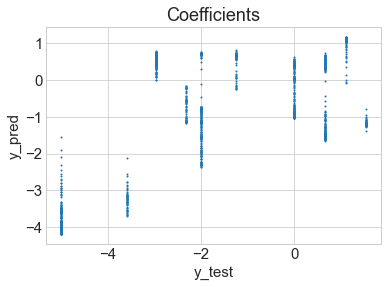

In [89]:
axe = plt.axes()
plt.rcParams.update({'font.size':15})
plt.style.use('seaborn-whitegrid')
plt.scatter(y_test[:,:,1], y_pred[:,:,1], s=1)
plt.title('Coefficients')
axe.set(xlabel="y_test", ylabel="y_pred")
plt.show()
# plt.scatter(X_test, y_test, label="Données d'évaluation", color="b")

In [ ]:
idx = random.randint(0, len(X_train))
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose = 1)

In [ ]:
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

In [ ]:
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

In [ ]:
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(y_train[int(y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()
